In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [142]:
df=pd.read_csv("Train.csv")

In [143]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,30-06-2024,"62,754.3","60,973.1","63,006.6","60,703.7",37.21K,2.92%
1,29-06-2024,"60,973.4","60,403.7","61,192.8","60,382.8",26.56K,0.94%
2,28-06-2024,"60,403.3","61,684.6","62,175.4","60,081.9",58.95K,-2.08%
3,27-06-2024,"61,685.3","60,848.3","62,351.2","60,629.4",48.79K,1.37%
4,26-06-2024,"60,849.4","61,809.9","62,469.4","60,715.1",54.95K,-1.55%


In [144]:
df.dtypes

,0
Date,object
Price,object
Open,object
High,object
Low,object
Vol.,object
Change %,object


In [145]:
df["Date"]=pd.to_datetime(df["Date"],format="%d-%m-%Y")

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3834 entries, 0 to 3833
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      3834 non-null   datetime64[ns]
 1   Price     3834 non-null   object        
 2   Open      3834 non-null   object        
 3   High      3834 non-null   object        
 4   Low       3834 non-null   object        
 5   Vol.      3834 non-null   object        
 6   Change %  3834 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 209.8+ KB


In [147]:
df["Year"]=df["Date"].dt.year

In [148]:
df=df.drop("Change %",axis=1)

In [149]:
def to_float(data, columns):
    for column in columns:
        data[column] = data[column].str.replace(",", "").str.replace("K", "").str.replace("L", "").str.replace("M", "").str.replace("B", "").str.replace("%","")
        data[column] = data[column].astype(float)
    return data


object_columns = [column for column in df.columns if df[column].dtype == "object"]


df = to_float(df, object_columns)


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3834 entries, 0 to 3833
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3834 non-null   datetime64[ns]
 1   Price   3834 non-null   float64       
 2   Open    3834 non-null   float64       
 3   High    3834 non-null   float64       
 4   Low     3834 non-null   float64       
 5   Vol.    3834 non-null   float64       
 6   Year    3834 non-null   int32         
dtypes: datetime64[ns](1), float64(5), int32(1)
memory usage: 194.8 KB


In [151]:
avg_price_per_year=df.groupby("Year").agg({"Price":"mean"}).reset_index()
avg_price_per_year

,Year,Price
0,2014,522.891233
1,2015,272.024110
2,2016,566.997814
3,2017,3981.072329
4,2018,7552.158356
5,2019,7371.821918
6,2020,11111.631148
7,2021,47410.840000
8,2022,28185.670959
9,2023,28851.698630


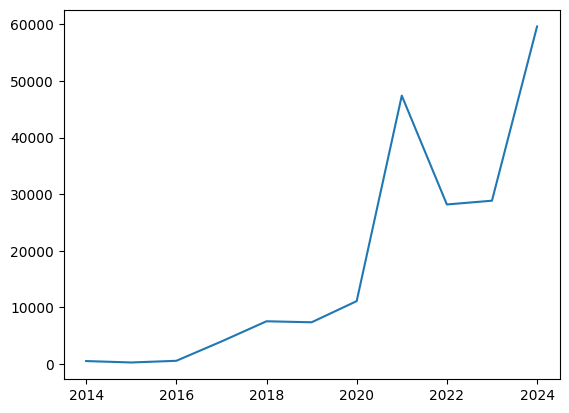

In [152]:
plt.plot(avg_price_per_year["Year"],avg_price_per_year["Price"])
plt.show()

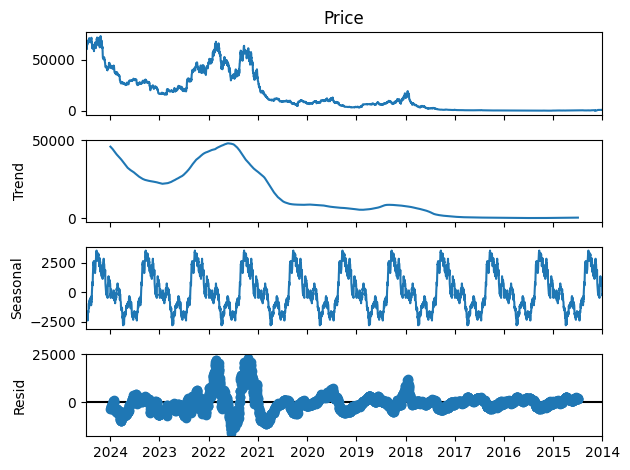

In [153]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
train=df.set_index("Date")
decomposition = seasonal_decompose(train['Price'], model='additive',period=365)
decomposition.plot()
plt.show()


In [154]:
df=df.reset_index()

In [155]:
df.head()

,index,Date,Price,Open,High,Low,Vol.,Year
0,0,2024-06-30,62754.3,60973.1,63006.6,60703.7,37.21,2024
1,1,2024-06-29,60973.4,60403.7,61192.8,60382.8,26.56,2024
2,2,2024-06-28,60403.3,61684.6,62175.4,60081.9,58.95,2024
3,3,2024-06-27,61685.3,60848.3,62351.2,60629.4,48.79,2024
4,4,2024-06-26,60849.4,61809.9,62469.4,60715.1,54.95,2024


<Axes: >

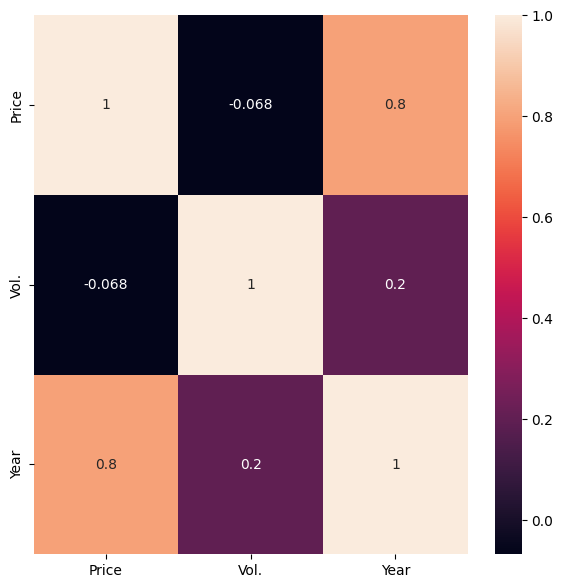

In [156]:
import seaborn as sns
corr=df[["Price","Vol.","Year"]].corr()
plt.figure(figsize=(7,7))
sns.heatmap(corr,annot=True)

<Axes: xlabel='Vol.', ylabel='Price'>

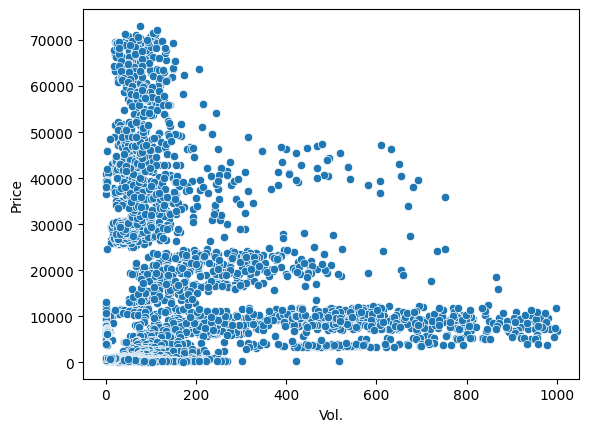

In [157]:
sns.scatterplot(data=df,x="Vol.",y="Price")

Higher trading volumes are associated with lower prices, and vice versa. This could mean that during periods of high trading activity, the price of Bitcoin tends to drop.

In [158]:
open_close_avg=df.groupby("Year").agg({"Open":"max","Low":"max"}).reset_index()
open_close_avg

,Year,Open,Low
0,2014,1014.7,964.7
1,2015,463.2,453.5
2,2016,972.2,949.2
3,2017,19346.6,18750.9
4,2018,17174.5,16286.6
5,2019,13062.4,12111.2
6,2020,28866.8,28025.0
7,2021,67528.7,66334.9
8,2022,47738.7,47029.0
9,2023,44175.5,43617.4


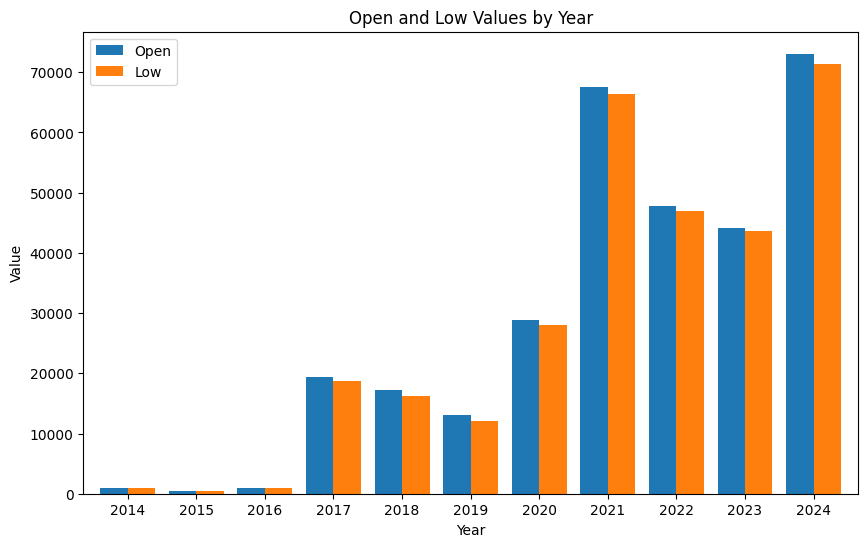

In [159]:
open_close_avg.set_index('Year', inplace=True)
open_close_avg.plot(kind='bar', figsize=(10, 6), width=0.8)
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Open and Low Values by Year')
plt.legend(['Open', 'Low'])
plt.xticks(rotation=0)
plt.show()


In [160]:
df.set_index("Date",inplace=True)

In [161]:
train["Change"]=train["Price"].pct_change()*100

In [162]:
window_size = 30
train['Rolling_Volatility'] = train['Change'].rolling(window=window_size).std()

Standard deviation is commonly used in volatility analysis because it quantifies the amount of variation or dispersion in a set of values.

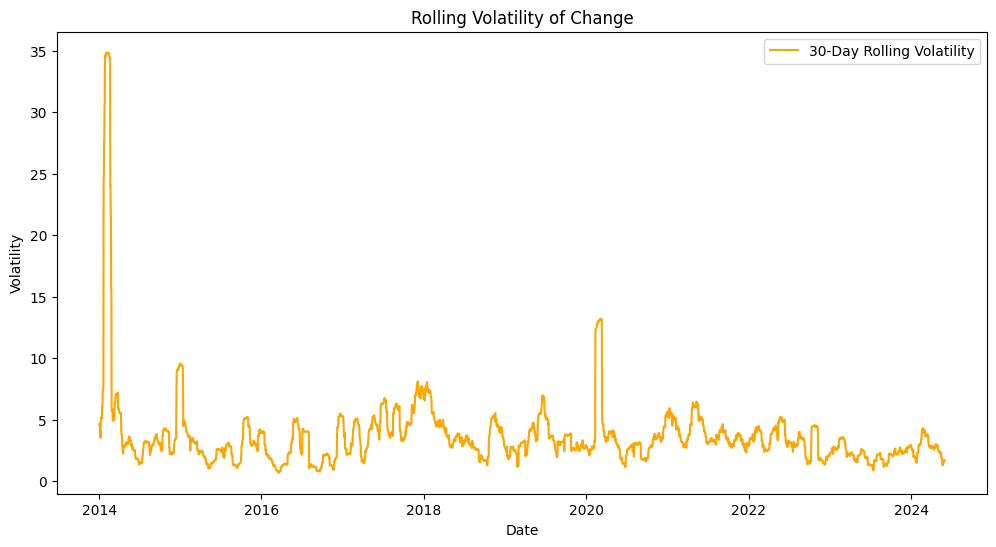

In [163]:
plt.figure(figsize=(12, 6))
plt.plot(train['Rolling_Volatility'],label='30-Day Rolling Volatility', color='orange')
plt.title('Rolling Volatility of Change')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

In [164]:
train=pd.read_csv("Train.csv")
train.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,30-06-2024,"62,754.3","60,973.1","63,006.6","60,703.7",37.21K,2.92%
1,29-06-2024,"60,973.4","60,403.7","61,192.8","60,382.8",26.56K,0.94%
2,28-06-2024,"60,403.3","61,684.6","62,175.4","60,081.9",58.95K,-2.08%
3,27-06-2024,"61,685.3","60,848.3","62,351.2","60,629.4",48.79K,1.37%
4,26-06-2024,"60,849.4","61,809.9","62,469.4","60,715.1",54.95K,-1.55%


In [165]:
train=to_float(train,["Open"])

In [166]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3834 entries, 0 to 3833
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      3834 non-null   object 
 1   Price     3834 non-null   object 
 2   Open      3834 non-null   float64
 3   High      3834 non-null   object 
 4   Low       3834 non-null   object 
 5   Vol.      3834 non-null   object 
 6   Change %  3834 non-null   object 
dtypes: float64(1), object(6)
memory usage: 209.8+ KB


In [167]:
train_set=train.iloc[:,2:3].values


In [168]:
train_set

array([[60973.1],
       [60403.7],
       [61684.6],
       ...,
       [  856.9],
       [  815.9],
       [  805.9]])

In [169]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
train_sc=sc.fit_transform(train_set)

In [170]:
train_sc.shape

(3834, 1)

In [171]:
X_train = []
y_train = []
for i in range(60, 3834):
    X_train.append(train_sc[i-60:i, 0])
    y_train.append(train_sc[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [172]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

Desired Shape:((number_of_samples, number_of_timesteps, number_of_features)):	LSTM networks in frameworks like Keras expect the input data to be in 3D shape: (batch_size, timesteps, features).

In [173]:
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout


In [174]:
regressor=Sequential()


In [175]:
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.3))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [176]:
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.3))

In [177]:
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.3))

In [178]:
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.3))

In [179]:
regressor.add(Dense(units=1))

The Dense (fully connected) layer is used to take the high-level features learned by the LSTM layers and map them to the desired output.

In [180]:
regressor.compile(optimizer="adam",loss="mean_squared_error")

In [181]:
regressor.fit(X_train,y_train,epochs=24,batch_size=32)

Epoch 1/24
118/118 ━━━━━━━━━━━━━━━━━━━━ 21s 124ms/step - loss: 0.0153
Epoch 2/24
118/118 ━━━━━━━━━━━━━━━━━━━━ 14s 121ms/step - loss: 0.0040
Epoch 3/24
118/118 ━━━━━━━━━━━━━━━━━━━━ 21s 122ms/step - loss: 0.0034
Epoch 4/24
118/118 ━━━━━━━━━━━━━━━━━━━━ 21s 124ms/step - loss: 0.0023
Epoch 5/24
118/118 ━━━━━━━━━━━━━━━━━━━━ 15s 123ms/step - loss: 0.0023
Epoch 6/24
118/118 ━━━━━━━━━━━━━━━━━━━━ 20s 121ms/step - loss: 0.0020
Epoch 7/24
118/118 ━━━━━━━━━━━━━━━━━━━━ 14s 122ms/step - loss: 0.0019
Epoch 8/24
118/118 ━━━━━━━━━━━━━━━━━━━━ 15s 124ms/step - loss: 0.0019
Epoch 9/24
118/118 ━━━━━━━━━━━━━━━━━━━━ 14s 122ms/step - loss: 0.0022
Epoch 10/24
118/118 ━━━━━━━━━━━━━━━━━━━━ 14s 122ms/step - loss: 0.0020
Epoch 11/24
118/118 ━━━━━━━━━━━━━━━━━━━━ 16s 135ms/step - loss: 0.0019
Epoch 12/24
118/118 ━━━━━━━━━━━━━━━━━━━━ 19s 125ms/step - loss: 0.0015
Epoch 13/24
118/118 ━━━━━━━━━━━━━━━━━━━━ 20s 123ms/step - loss: 0.0015
Epoch 14/24
118/118 ━━━━━━━━━━━━━━━━━━━━ 20s 122ms/step - loss: 0.0016
Epoch 15/24
118

In [182]:
test = pd.read_csv('Test.csv')
test.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,08-08-2024,"57,310.7","55,112.8","57,635.7","54,786.9",89.75K,3.97%
1,07-08-2024,"55,120.9","56,049.9","57,669.6","54,598.5",94.52K,-1.67%
2,06-08-2024,"56,057.8","54,010.8","57,025.6","53,998.2",113.89K,3.85%
3,05-08-2024,"53,979.0","58,142.9","58,291.4","49,486.9",333.46K,-7.16%
4,04-08-2024,"58,141.8","60,700.2","61,086.5","57,346.9",72.71K,-4.21%


In [183]:
test=to_float(test,["Open"])

In [184]:
test_set = test.iloc[:, 2:3].values

In [185]:
test_set.shape

(39, 1)

In [186]:
dataset_total = pd.concat((train['Open'], test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 99):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 629ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step


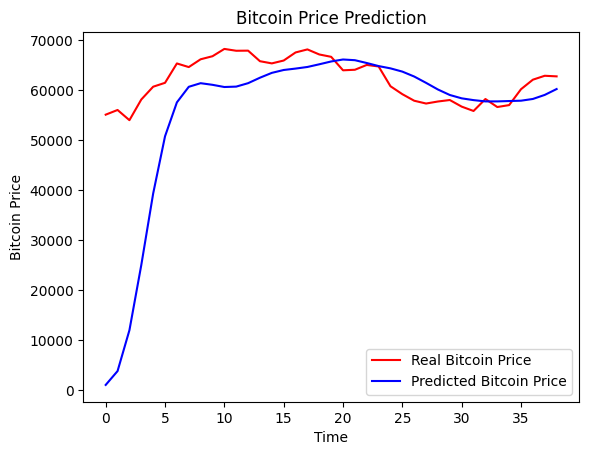

In [187]:
plt.plot(test_set, color = 'red', label = 'Real Bitcoin Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.show()